Differenza tra regressione e classificazione:
*  la regressione è continua, es prezzo delle case 
*  classificazione: appartenenza alle classi, esempio riconoscimento di una faccia, o di una foglia

Fanno entrambe parte dell'area bottom-up, supervised machine learning. 
Supervised machine learning: la differenza tra unsupervised è che nel supervised abbiamo già il target (abbiamo già i labels). 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# impostazione per vedere tutte le colonno di un DataFrame
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.shape #numero righe, numero colonne (features + target)\

(1460, 81)

#1° step: EDA- exploratory data analysis
Si fa prima del train/test split

# TRAIN/TEST SPLIT

Prima di tutto dividiamo il set in dati di TRAINING e dati di TEST. Questo è fondamentale per poter testare le capacità predittive di un modello su dati che non ha mai incontrato. sklearn mette a disposizione una comodo funzione per fare questo: train_test_split()


**Lo faccio per evitare l'overfitting!**

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22) #(splittami il df; test_size=0.25 è 25%, shuffle=True mischia i dati così prima mischia e poi divide, 
#non posso farlo sempre, ad esempio se ho dei dati ordinati temporalmente non lo faccio;
# random_state= perché dev'essere riproducibile; corrisponde a random seed di python)

Riduciamo il nostro train_df alla singola variabile 'GrLivArea', una delle più correlate con SalePrice. Solitamente si usa indicare con X l'insieme delle 'features' e con y il target da prevedere.

In [ ]:
train_df.shape

(1095, 81)

In [ ]:
test_df.shape #365 esempi con 81 features

(365, 81)

*  Features la indico con **X**
*  Target lo indico con **Y**

In [ ]:
X_train = train_df['GrLivArea'].copy() #feature
y_train = train_df['SalePrice'].copy() #target
#metto .copy() perché quando vado a fare un subset c'è il rischio che lo faccio anche su train_df
X_test = test_df['GrLivArea'].copy()
y_test = test_df['SalePrice'].copy()

In [ ]:
# check se ci sono valori nulli
print(X_train.isna().any())
print(y_train.isna().any()) 
print(X_test.isna().any())
print(y_test.isna().any()) 

False
False
False
False


# MODELLO LINEARE 'HOME-MADE' (esercizio concettuale)

Un modello ha sempre due fasi:
*  Fitting
*  Evaluation

#### 1. FITTING

**Il fitting è l'allenamento sul modello del train set, per scikit è .fit()**



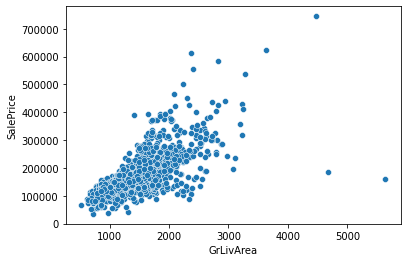

In [ ]:
sns.scatterplot(x=X_train, y=y_train);

Essendo la correlazione così ben visibile possiamo aspettarci che una semplice 'retta' sia già un buon modello che ci permetta di prevedere SalePrice conoscendo GrLivArea. Ma come scegliamo la retta giusta?

Una retta è identificata da due parametri: l'inclinazione e l'intercetta. Andando a occhio si può dire che l'intercetta sia vicina o poco superiore a 0, il che ha senso pensando che una casa di 0 metri quadrati valga... 0. Quindi per ora concentriamoci sull'inclinazione, per la quale possiamo andare un pò a tentativi. Proviamo a scrivere la retta direttamente 'a mano' (niente paura, non lo faremo più andando avanti :) )

In [ ]:
# inclinazione
alpha = 50
#y=alpha*x + beta
# intercetta
beta = 0

preds = (alpha * X_train) + beta

In [ ]:
preds

571      43200
1356     44600
198     111450
230      59700
986      81750
         ...  
356      58350
960      42900
812      52200
132      66350
885      85450
Name: GrLivArea, Length: 1095, dtype: int64

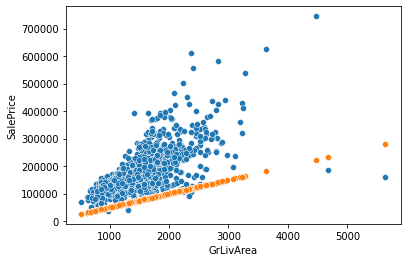

In [ ]:
sns.scatterplot(x=X_train, y=y_train)
sns.scatterplot(x=X_train, y=preds)
plt.show()

Ok, l'inclinazione è evidentemente troppo bassa. Proviamone un pò

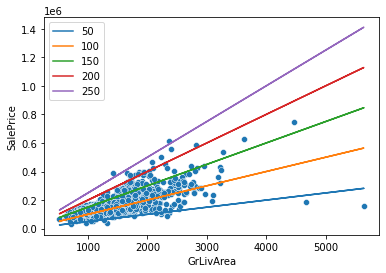

In [ ]:
sns.scatterplot(x=X_train, y=y_train)

for alpha in [50,100,150,200,250]:
    preds = (alpha * X_train) + 0
    plt.plot(X_train, preds, label=alpha)
plt.legend()
plt.show()

Costruisco la distanza dei punti dal modello retta per capire se il mio modello è buono (absolute error)

Sembra che l'inclinazione giusta sia da qualche parte tra 100 e 150 ... ma per sceglierne una si deve poter valutare quantitativamente la bontà di questo primo modello. Bisogna scegliere una metrica di valutazione. 

Per esempio si Può usare il Mean Absolute Error (MAE), che è il valore assoluto della distanza di ogni dato reale dalla retta scelta. Ci viene in aiuto sklearn, che mette a disposizione una serie molto ampia di metriche di valutazione, tra cui anche il MAE.

In [ ]:
from sklearn.metrics import mean_absolute_error

# calcoliamolo per ogni retta
for alpha in [50,100,150,200,250]:
    preds = alpha * X_train
    mae = mean_absolute_error(y_train, preds)
    print('MAE (alpha={}): {} '.format(alpha, mae))


MAE (alpha=50): 104980.17808219178 
MAE (alpha=100): 45324.71324200913 
MAE (alpha=150): 57521.12602739726 
MAE (alpha=200): 122741.0401826484 
MAE (alpha=250): 196996.45570776256 


In [ ]:
#posso fare la stessa cosa usando il range
for alpha in range(0, 250,5):
    preds = alpha * X_train
    mae = mean_absolute_error(y_train, preds)
    print('MAE (alpha={}): {} '.format(alpha, mae))

MAE (alpha=0): 179853.37442922374 
MAE (alpha=5): 172318.49315068492 
MAE (alpha=10): 164783.6118721461 
MAE (alpha=15): 157248.7305936073 
MAE (alpha=20): 149713.84931506848 
MAE (alpha=25): 142178.96803652967 
MAE (alpha=30): 134661.0 
MAE (alpha=35): 127188.77625570777 
MAE (alpha=40): 119729.48401826483 
MAE (alpha=45): 112331.04109589041 
MAE (alpha=50): 104980.17808219178 
MAE (alpha=55): 97734.06757990867 
MAE (alpha=60): 90620.8392694064 
MAE (alpha=65): 83643.61095890412 
MAE (alpha=70): 76931.93515981735 
MAE (alpha=75): 70498.73789954338 
MAE (alpha=80): 64440.9799086758 
MAE (alpha=85): 58799.768036529684 
MAE (alpha=90): 53768.192694063924 
MAE (alpha=95): 49227.54885844749 
MAE (alpha=100): 45324.71324200913 
MAE (alpha=105): 42288.64657534246 
MAE (alpha=110): 40128.5598173516 
MAE (alpha=115): 39030.25388127854 
MAE (alpha=120): 38931.739726027394 
MAE (alpha=125): 39815.24748858447 
MAE (alpha=130): 41714.850228310504 
MAE (alpha=135): 44566.98630136986 
MAE (alpha=140

Sembra in effetti che il MAE più basso ce l'abbia la retta con inclinazione 100. In questo caso il modello sbaglia mediamente la valutazione del prezzo di 44 mila dollari circa. Come possiamo migliorare il fit del modello ai dati? Ora che abbiamo scelto una metrica di valutazione possiamo provare a ottimizzare il parametro alpha diminuendo lo step tra un alpha e l'altro. Inoltre, già che ci siamo, possiamo provare anche a trovare un buon beta

In [ ]:
error_df = pd.DataFrame(columns=['alpha','beta','MAE'])

# calcoliamolo per ogni retta sia alpha che beta
n=0
for alpha in np.arange(100, 150, 5):
    for beta in np.arange(0,10000, 500):
        preds = (alpha * X_train) + beta
        mae = mean_absolute_error(y_train, preds)
        
        error_df = error_df.append({'alpha':alpha, 'beta':beta, 'MAE':mae}, ignore_index=True) #metto tutto in un df
        
        print('MAE (alpha={}, beta={}): {} '.format(alpha, beta, mae))
                
        n+=1
        

MAE (alpha=100, beta=0): 45324.71324200913 
MAE (alpha=100, beta=500): 45073.84566210046 
MAE (alpha=100, beta=1000): 44826.08310502283 
MAE (alpha=100, beta=1500): 44583.10593607306 
MAE (alpha=100, beta=2000): 44345.20639269406 
MAE (alpha=100, beta=2500): 44110.594520547944 
MAE (alpha=100, beta=3000): 43878.72237442922 
MAE (alpha=100, beta=3500): 43651.59908675799 
MAE (alpha=100, beta=4000): 43429.04200913242 
MAE (alpha=100, beta=4500): 43209.95525114155 
MAE (alpha=100, beta=5000): 42996.16529680365 
MAE (alpha=100, beta=5500): 42788.037442922374 
MAE (alpha=100, beta=6000): 42586.48493150685 
MAE (alpha=100, beta=6500): 42391.59908675799 
MAE (alpha=100, beta=7000): 42199.36164383562 
MAE (alpha=100, beta=7500): 42009.80182648402 
MAE (alpha=100, beta=8000): 41823.04383561644 
MAE (alpha=100, beta=8500): 41640.77899543379 
MAE (alpha=100, beta=9000): 41463.33607305936 
MAE (alpha=100, beta=9500): 41289.911415525115 
MAE (alpha=105, beta=0): 42288.64657534246 
MAE (alpha=105, b

In [ ]:
error_df

,alpha,beta,MAE
0,100.0,0.0,45324.713242
1,100.0,500.0,45073.845662
2,100.0,1000.0,44826.083105
3,100.0,1500.0,44583.105936
4,100.0,2000.0,44345.206393
...,...,...,...
195,145.0,7500.0,57535.413699
196,145.0,8000.0,57883.130594
197,145.0,8500.0,58234.829224
198,145.0,9000.0,58589.934247


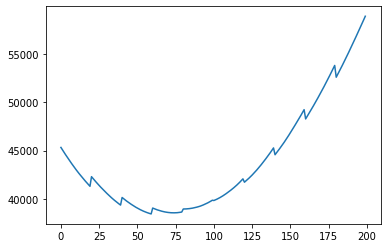

In [ ]:
plt.plot(error_df['MAE']);
plt.show() 

Per trovare il modello migliore a questo punto basta trovare il MAE minimo, et voilà...! Avremo trovato i migliori parametri della retta. 

In gergo tecnico, quella che vedete plottata qui sopra si chiama 'LOSS FUNCTION', ed è la funzione da minimizzare (o in altri casi massimizzare) per trovare il modello che fitta meglio i dati. Non a caso, questa fase si chiama proprio FITTING.

Non è affatto detto che usare il MAE come loss function sia la scelta migliore! In effetti c'è un vera e propria miriade di possibili loss function. Per nostra fortuna sklearn (e tante altre librerie) già incorporano la maggior parte di queste, e di fatto non dovremo preoccuparcene troppo. Ma in questo caso è semplice trovare un minimo, quindi facciamo a mano.

In [ ]:
# troviamo il MAE minimo
print('min MAE: ', error_df['MAE'].min())

min MAE:  38421.83287671233


In [ ]:
# e i corrispondenti parametri della retta
min_index = error_df['MAE'].idxmin()
print('Alpha: ', error_df.loc[min_index]['alpha'])
print('Beta: ', error_df.loc[min_index]['beta'])

Alpha:  110.0
Beta:  9500.0


Ok, sembra che la retta migliore (cioè quella che ha il MAE più basso sui dati di training) sia quella con alpha=115 e beta=9500, con un MAE di circa 37k. Abbiamo dunque il nostro primo modello! Che è capace di dare una previsione del prezzo di una casa (per quanto ancora parecchio imprecisa) a partire dalla sola metratura del piano terra.

#### 2. EVALUATION

Ora ci rimane solo da testare il modello con dati ancora mai incontrati. A questo serve il test set che ci siamo tenuti da parte all'inizio.

In [ ]:
alpha = 115
beta = 9500

test_preds = (alpha * X_test) + beta

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score #r2 spiega le previsioni della mia varianza, tipicamente va da 0 a 1, un buon valore è 0.6-0.7
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)

print('TEST SET')
print('MAE: ', mae)
print('R2: ', r2)

TEST SET
MAE:  36728.53424657534
R2:  0.5945564465424646


Ok, il MAE è abbastanza vicino a quello trovato sui dati di training, ma chiaramente diverse visto che viene calcolato su altri dati.

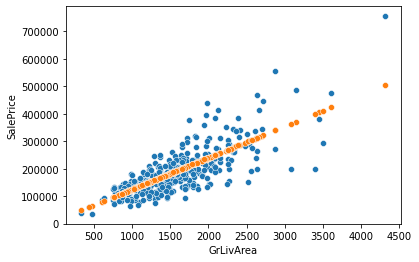

In [ ]:
sns.scatterplot(x=X_test, y=y_test)
sns.scatterplot(x=X_test, y=test_preds)
plt.show()

# SCIKIT-LEARN: LinearRegression()

Come avrete notato può non essere così banale trovare il risultato migliore, soprattutto quando i parametri del modello cominciano ad aumentare. Per fortuna sklearn ha già integrati una serie di algoritmi di fitting dei modelli. Se volessimo riscrivere questo processo usando sklearn basterbbe: 
- scegliere e inizializzare un modello, in questo caso sklearn.linear_model.LinearRegression
- chiamare il metodo **.fit()** per fittare il modello ai dati di training
- chiamare il metodo **.predict()** per calcolare le previsioni del modello sul test set
- valutare la performance del modello sul test set con una metrica scelta, per esempio il MAE (oppure r2).

### SINGOLA FEATURE

#### 1. FITTING DEL MODELLO: .fit()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Come abbiamo visto il fitting è un processo che prevede la minimizzazione di una metrica di 'loss function'. Prima abbiamo usato il MAE per semplicità. La LinearRegression di sklearn usa il metodo 'Ordinary Least Squares' (OLS)(*le distanze quadrate, fatte in default da linear regression)*, che è un processo iterativo in cui per ogni insieme di parametri che definiscono il modello (in questo caso la retta) si calcola l'errore quadratico (y-pred)^2, e cerca di minimizzarlo.
Per qualche info in più: https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [ ]:
#Per dataset con un singola variabile sklearn richiede un reshaping, ma in tutti gli altri casi basterà passare direttamente il DataFrame 
X_train_reshaped = X_train.to_numpy().reshape(-1,1) #per fare una sola variabile
model = model.fit(X=X_train_reshaped, y=y_train) 

In [ ]:
print('Inclinazione: ',model.coef_)
print('Intercetta: ',model.intercept_)

Inclinazione:  [103.6351681]
Intercetta:  23677.63685159484


#### 2. EVALUATION SUL TEST SET: .predict()

In [ ]:
X_test_reshaped = X_test.to_numpy().reshape(-1, 1) #ricordati di fare il reshaping

train_preds = model.predict(X_train_reshaped) #uso il modello per fare previsioni su x_test ed x_train
test_preds = model.predict(X_test_reshaped)

In [ ]:
train_mae = mean_absolute_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

print('TRAIN SET')
print('MAE: ', train_mae)
print('R2: ', train_r2)

test_mae = mean_absolute_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

print('\nTEST SET')
print('MAE: ', test_mae)
print('R2: ', test_r2)

TRAIN SET
MAE:  38055.68038362748
R2:  0.4691781701477492

TEST SET
MAE:  36073.621548056755
R2:  0.5883041298299418


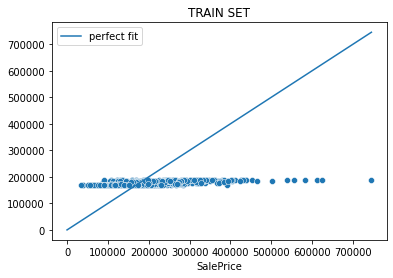

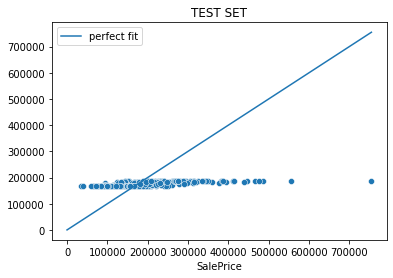

In [ ]:
###### previsioni VS targets
sns.scatterplot(x=y_train, y=train_preds)
###### retta di perfect fit
plt.plot(range(0,y_train.max()), range(0,y_train.max()), label='perfect fit')
plt.title('TRAIN SET')
plt.legend()
plt.show()

###### previsioni VS targets
sns.scatterplot(x=y_test, y=test_preds)
###### retta di perfect fit
plt.plot(range(0,y_test.max()), range(0,y_test.max()), label='perfect fit')
plt.title('TEST SET')
plt.legend()
plt.show()

Lo scatter plot delle previsioni contro i target è molto informativo. Se le previsioni fossero perfette starebbero tutte sulla retta di perfect fit, che è proprio la retta in cui xè sempre uguale a y.
In questo caso è evidente che il modello sottostima in modo consistente le case con prezzi più alti, e sovrastima quelle con prezzo più basso.

!!BONUS!! visto che la useremo molto, per fare prima possiamo definire una funzione che ci restituisce come output le metriche di valutazione e fa il plot del fit

**L'utilizzo del MAE o altri definisce l'algoritmo che utilizziamo**

In [ ]:
def evaluate(targets, preds, title, plots=True, verbose=True): #prende in input target e preds
    
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose: #se gli ho detto di scrivere fa queste cose 
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

TRAIN SET
MAE:  38055.68038362748
R2:  0.4691781701477492


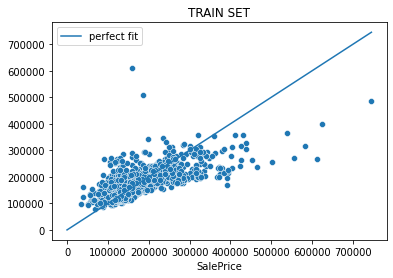

TEST SET
MAE:  36073.621548056755
R2:  0.5883041298299418


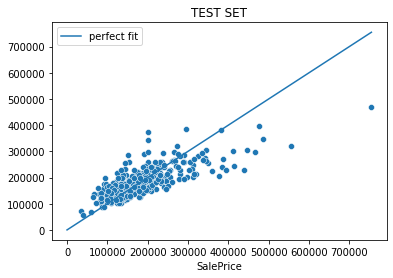

In [ ]:
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET') #in default ha verbose=True
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

### 3 FEATURES

Recuperiamo altre features numeriche per migliorare il nostro forecast. Prediamone per esempio 3 in tutto: 'OverallQual', 'GrLivArea', 'GarageCars', che erano le più correlate quando abbiamo fatto la dataset exploration

In [ ]:
features_list = ['GrLivArea', 'OverallQual', 'GarageCars']

X_train = train_df[features_list].copy()
y_train = train_df['SalePrice'].copy()

X_test = test_df[features_list].copy()
y_test = test_df['SalePrice'].copy()

In [ ]:
### FITTING

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model = model.fit(X=X_train, y=y_train)

In [ ]:
print('Inclinazione: ')
for coef in model.coef_:
    print(coef)
print('\nIntercetta: ', model.intercept_)

Inclinazione: 
46.016178124027626
27483.8854680132
22732.661411843383

Intercetta:  -96670.0550473473


In questo caso il modello lineare avrà un coefficiente di inclinazione per ogni feature. Si parla in questo caso regressione lineare multi-variata (in contrasto alla regressione uni-variata).

TRAIN SET
MAE:  27696.774541071834
R2:  0.7249477063817809


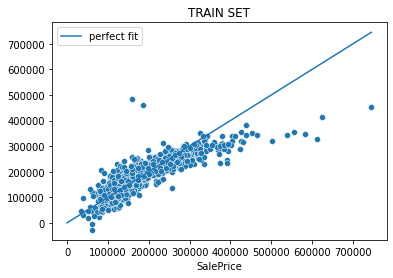

TEST SET
MAE:  27059.026850298756
R2:  0.7743137292881643


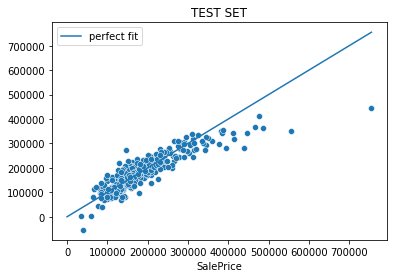

In [ ]:
### EVALUATION

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
#utilizzo la funzione di evaluation
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

Si nota un netto miglioramento, anche solo aumentando il numero di feature che diamo in pasto al modello.

Il fit è migliorato, anche se ancora sulle case con prezzi più alti ha una sottostima evidente.

### 6 FEATURES

Recuperiamo altre features numeriche per migliorare il nostro forecast. Prediamone per esempio 3 in tutto: 'OverallQual', 'GrLivArea', 'GarageCars', che erano le più correlate quando abbiamo fatto la dataset exploration

In [ ]:
features_list = ['OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath','TotRmsAbvGrd']

X_train = train_df[features_list].copy()
y_train = train_df['SalePrice'].copy()

X_test = test_df[features_list].copy()
y_test = test_df['SalePrice'].copy()

In [ ]:
### FITTING

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model = model.fit(X=X_train, y=y_train) 

In questo caso il modello lineare avrà un coefficiente di inclinazione per ogni feature. Si parla in questo caso regressione lineare multi-variata (in contrasto alla regressione uni-variata).

TRAIN SET
MAE:  25577.102798530974
R2:  0.7441299573486234


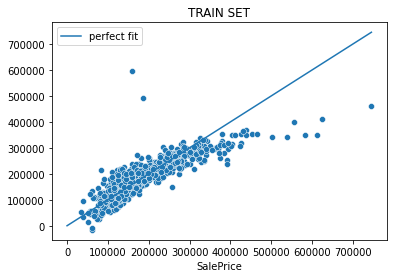

TEST SET
MAE:  24763.007758303855
R2:  0.8009568679333834


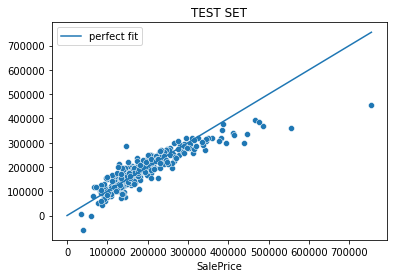

In [ ]:
### EVALUATION

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# usiamo la funzione che abbiamo definito prima
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

### CATEGORICAL FEATURES

Se voglio aggiungere variabile categoriche alla previsione, non posso lasciarle così come sono. Scikit-learn si aspetta solo variabile numeriche in input, non riesce a processare delle stringhe. La variabie MSZoning, per esempio, ha 5 categorie possibili:

In [ ]:
set(train_df['MSZoning'])

{'C (all)', 'FV', 'RH', 'RL', 'RM'}

Una possibilità sarebbe quella di assegnare a ogni categoria un numero. Ma questa tecnica può dare dei problemi, perchè il modello potrbbe implicitamente inferire che c'è una relazione incrementale tra una categoria e l'altra. Per evitare questo problema si utilizza un altro metodo: si creano delle cosiddette variabili 'dummy'. Nel caso di MSZoning dovrò trasformare la variabile in 5 variabili distinte (una per categoria), che avranno valore 1 o 0. Se per esempio una casa appartiene alla categoria di MSZoning 'FV', allora avrò la dummy 'FV' 1, e le altre 4 dummy 0.

pandas mette a disposizione una funzione specifica per questo: .get_dummies(). Questa funzione ha dei limiti e per progetti più strutturati converrebbe usare OneHotEncoder() di scikit-learn, che può essere per esempio insierita in una pipeline di scikit-learn. Ad ogni modo per i nostri scopi get_dummies è molto più comoda

In [ ]:
categorical_features = ['MSZoning','Neighborhood']
train_dummies = pd.get_dummies(train_df[categorical_features], drop_first=True)

Aggiungiamole a quelle numeriche di prima:

In [ ]:
features_list = ['OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath','TotRmsAbvGrd']

X_train = train_df[features_list].copy()
y_train = train_df['SalePrice'].copy()

X_test = test_df[features_list].copy()
y_test = test_df['SalePrice'].copy()

In [ ]:
train_dummies = pd.get_dummies(train_df[categorical_features], drop_first=True)
X_train = pd.concat([X_train,train_dummies], axis=1, ignore_index=False)

test_dummies = pd.get_dummies(test_df[categorical_features], drop_first=True)
X_test = pd.concat([X_test,test_dummies], axis=1, ignore_index=False)

In [ ]:
X_train

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
571,6,864,1,864,1,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1356,5,892,1,864,1,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
198,6,2229,0,755,1,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
230,6,1194,1,1194,1,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
986,6,1635,1,485,1,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,6,1167,2,1158,2,6,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
960,5,858,0,858,1,4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
812,5,1044,2,540,1,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132,5,1327,2,1063,1,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
### FITTING

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model = model.fit(X=X_train, y=y_train)

TRAIN SET
MAE:  22044.257519319683
R2:  0.8016393600716091


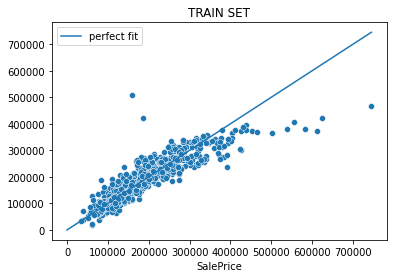

TEST SET
MAE:  21904.47066091528
R2:  0.825116614091683


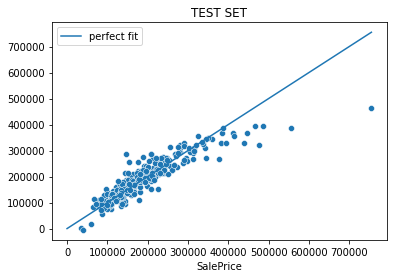

In [ ]:
### EVALUATION

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# usiamo la funzione che abbiamo definito prima
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

# K-NEAREST NEIGHBORS (KNN)

In [ ]:
### FITTING

from sklearn.neighbors import KNeighborsRegressor
 
model = KNeighborsRegressor(n_neighbors = 5)
model = model.fit(X_train, y_train)


TRAIN SET
MAE:  25545.668858447487
R2:  0.7423060089273315


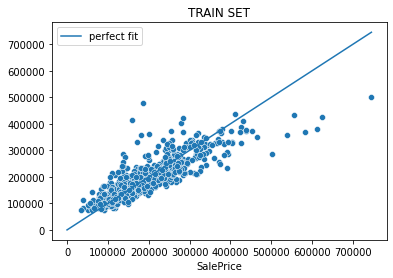

TEST SET
MAE:  30266.75232876713
R2:  0.7002197552602245


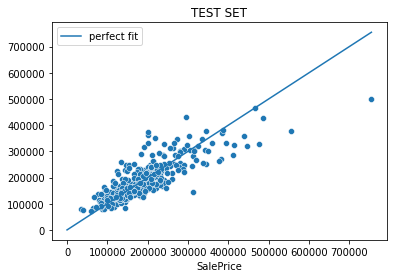

In [ ]:
### EVALUATION

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

### K parameter: Increasing model complexity

In [ ]:
X_train = train_df['GrLivArea'].to_numpy().reshape(-1,1)
X_test = test_df['GrLivArea'].to_numpy().reshape(-1,1)

In [ ]:
train_mae_list = list()
test_mae_list = list()

k_list = range(1, 1000, 5)

for k in k_list:
    
    model = KNeighborsRegressor(n_neighbors = k)
    model = model.fit(X_train, y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=False)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=False)
    
    train_mae_list += [train_metrics['mae']]
    test_mae_list += [test_metrics['mae']]
        

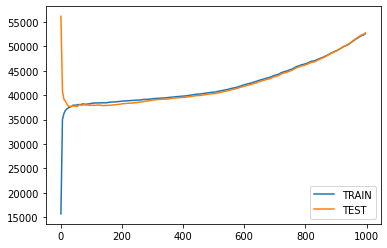

In [ ]:
plt.plot(k_list, train_mae_list, label='TRAIN')
plt.plot(k_list, test_mae_list, label='TEST')
plt.legend()

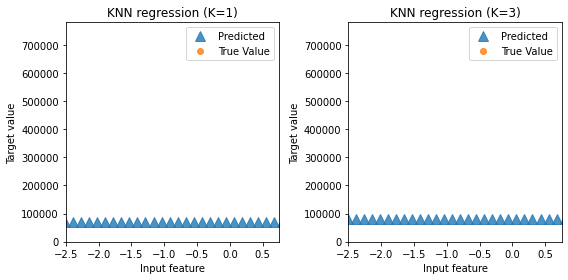

In [ ]:



fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()